# 一、箱线图
## 1.概述：
箱线图（Box Plot）是一种用于展示数据分布特征的统计图形工具，由 John Tukey 在 1970 年代提出。它通过显示数据的五个关键分位数（最小值、第一四分位数、中位数、第三四分位数和最大值），可以直观地观察数据的集中趋势、离散程度以及潜在的异常值。


* 背景：箱线图的核心思想是通过简洁的图形方式展示数据的分布情况，特别适用于数据量较大且需要快速概览的场景。它利用盒子和须状线（whiskers）来反映数据的主要分布特征，并且会标注出可能的异常值（outliers），非常适合用来对比不同数据集的分布差异。


* 用途： 

箱线图用于快速识别数据的分布特征，包括：
1. 数据的离散程度：箱子的高度展示了数据的分布范围，而须状线可以提供数据的整体范围。
2. 数据的偏态分布：通过观察中位数的位置和盒子的形状，可以了解数据是否偏向某一侧。
3. 异常值检测：箱线图会清晰地标记出异常值，使其在数据中一目了然。

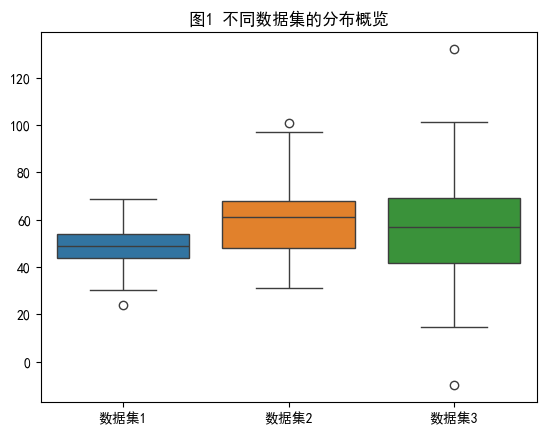

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']

# 生成三个数据集，模拟不同组的分布
np.random.seed(42)
data1 = np.random.normal(50, 10, 100)  
data2 = np.random.normal(60, 15, 100)  
data3 = np.random.normal(55, 20, 100)  
data = [data1, data2, data3]

# 使用 seaborn 绘制多组箱线图
sns.boxplot(data=data)
plt.title('图1 不同数据集的分布概览')
plt.xticks([0, 1, 2], ['数据集1', '数据集2', '数据集3'])  
plt.show()

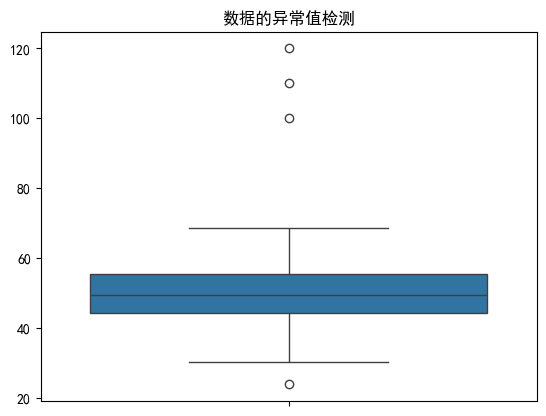

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 生成包含异常值的数据集
np.random.seed(42)
data_with_outliers = np.append(np.random.normal(50, 10, 100), [100, 110, 120]) 

# 使用 seaborn 绘制箱线图并突出显示异常值
sns.boxplot(data=data_with_outliers)
plt.title('图2 数据的异常值检测')
plt.show()

以上示例中 


图1 展示了多个数据集的分布情况，通过箱线图可以清晰地对比各组数据的中位数、四分位范围和分布情况。


图2 则用于检测异常值，箱线图通过将异常点显示在须状线之外，帮助识别数据中偏离主流分布的值。

* 适用场景
    1. 探索性数据分析（EDA）：箱线图用于快速浏览数据的分布情况，特别是对于多个数据集的比较。
    2. 检测异常值：通过可视化，箱线图能突出可能的异常值，有助于后续分析处理。
    3. 群体间的对比：当需要比较不同组的分布时，比如不同实验组的结果，箱线图能够清晰展现差异。
    4. 大规模数据分析：对于数据量较大、单纯的统计指标难以捕捉其分布特征的场景，箱线图能够提供更多信息。

## 2.示例

In [5]:
import pandas as pd
df = pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


我们以一组学生表现因素数据为例，用学习时长（Hours_Studied）和考试分数（Exam_Score）两列，通过箱线图来分析各学习时长下的考试分数表现。图3是一个简单的箱线图。

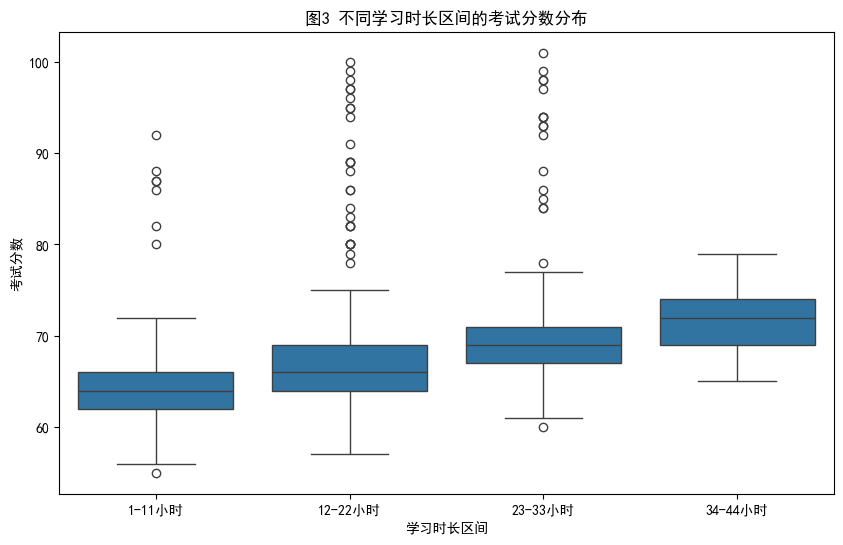

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype

def categorize_study_hours(hours):
    if 1 <= hours <= 11:
        return '1-11小时'
    elif 12 <= hours <= 22:
        return '12-22小时'
    elif 23 <= hours <= 33:
        return '23-33小时'
    else:
        return '34-44小时'

df['Study_Hours_Group'] = df['Hours_Studied'].apply(categorize_study_hours)
study_hours_order = ['1-11小时', '12-22小时', '23-33小时', '34-44小时']
study_hours_dtype = CategoricalDtype(categories=study_hours_order, ordered=True)
df['Study_Hours_Group'] = df['Study_Hours_Group'].astype(study_hours_dtype)

# 绘制根据学习时长区间分组的考试分数箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Hours_Group', y='Exam_Score', data=df)
plt.title('图3 不同学习时长区间的考试分数分布')
plt.xlabel('学习时长区间')
plt.ylabel('考试分数')
plt.show()


不难看出，随着学习时长的增加，考试的分数基本越高；且12-22小时组的数据的平均水平偏低，差异也比较明显。另外注意到，除了34-44小时组，其他组均有离群点。

## 3.绘制方法
可以使用不同的库绘制箱线图，下面介绍如何使用 Matplotlib、Seaborn 和 Plotly 绘制基本的箱线图，并解释每个库中绘图函数的使用和主要参数。
1. 使用matplotlib


Matplotlib 是 Python 中最基础的可视化库之一，支持创建各种类型的图表，包括箱线图。使用 boxplot() 函数可以绘制箱线图。代码语法示例如下：

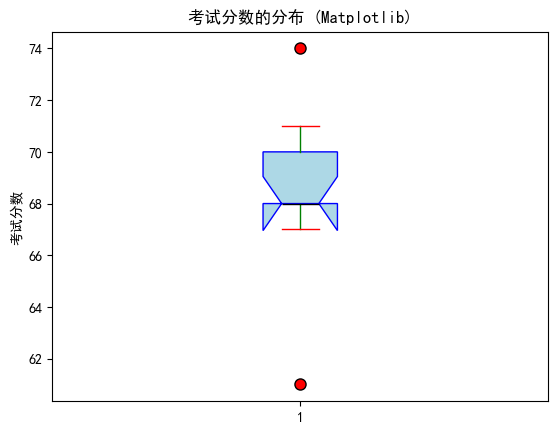

In [13]:
import matplotlib.pyplot as plt

scores = [67, 61, 74, 71, 70, 68, 69, 68, 68]

plt.boxplot(scores, 
            vert=True,  # 垂直绘制
            notch=True,  # 显示凹槽
            patch_artist=True,  # 填充颜色
            boxprops={'color': 'blue', 'facecolor': 'lightblue'},  # 箱子的属性
            whiskerprops={'color': 'green'},  # 胡须的属性
            capprops={'color': 'red'},  # 箱线图顶端和底端线条的属性
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8},  # 异常值的属性
            medianprops={'color': 'black'} # 中位数线条的属性
            )  
plt.title('考试分数的分布 (Matplotlib)')
plt.ylabel('考试分数')
plt.show()


boxplot() 函数常用参数说明：
* x/y：数据，通常为一组数值或多组数值的列表。
* vert：控制箱线图是垂直绘制（True）还是水平绘制（False）。
* notch：控制是否在箱子中间显示凹槽，以便更直观地展示中位数的置信区间。
* patch_artist：控制是否填充箱子的颜色，默认是 False。
* boxprops：用于设置箱子的外观，包括颜色、线条宽度、填充颜色等。
* whiskerprops：用于设置胡须（从箱子到上下边界线的线条）的外观。
* capprops：控制箱线图顶端和底端线条的外观。
* flierprops：控制异常值的标记类型和外观，如标记的形状、颜色和大小。
* medianprops：用于控制中位数线条的外观。
* widths：控制箱线图的宽度，默认是 0.5。
* positions：控制每个箱线图的相对位置，可以调整箱线图之间的距离。

2. Seaborn (boxplot)


Seaborn 中的 boxplot() 函数是一个高级接口，提供了更多简单调用的参数来美化图形。代码语法示例如下：

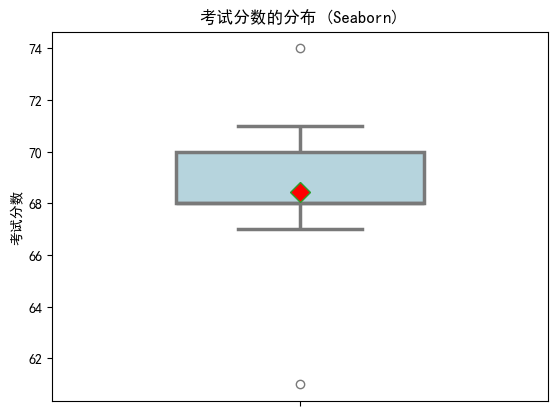

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

scores = [67, 61, 74, 71, 70, 68, 69, 68, 68]

sns.boxplot(data=scores, 
            color="lightblue",  # 设置箱线图的整体颜色
            orient='v',  # 方向，可以是 'v' (垂直) 或 'h' (水平)
            width=0.5,  # 设置箱线图的宽度
            linewidth=2.5,  # 控制箱线图边框的粗细
            notch=False,  # 是否绘制凹槽
            saturation=0.7,  # 控制颜色的透明度
            showmeans=True,  # 是否显示均值
            meanprops={'marker': 'D', 'markerfacecolor': 'red', 'markersize': 10} # 设置均值的显示样式
            )  

plt.title('考试分数的分布 (Seaborn)')
plt.ylabel('考试分数')
plt.show()

boxplot() 函数常用参数说明：
* data：数据源，可以是数组或 Pandas 的 DataFrame。
* x/y：用于指定箱线图中绘制的横纵坐标，通常对应数据框的列名。
* hue：基于某个分类变量对数据进行颜色区分。
* orient：控制箱线图的方向，v 为垂直，h 为水平。
* color：指定整个箱线图的颜色。
* palette：为多组数据设置配色方案。
* width：控制箱线图的宽度，默认为 0.8。
* linewidth：控制箱线图的边框线条宽度。
* saturation：控制颜色的饱和度，默认为 0.75。
* notch：是否显示凹槽，显示时为 True。
* showmeans：是否在箱线图中显示均值。
* meanprops：设置均值的显示样式，如形状、颜色和大小。

3. Plotly (box())


Plotly 提供了丰富的交互功能，通过 box() 函数可以创建交互式的箱线图。代码语法示例如下：

In [19]:
import plotly.express as px

scores = [67, 61, 74, 71, 70, 68, 69, 68, 68]

fig = px.box(y=scores, 
             points="outliers",  # 只显示异常值
             notched=False,  # 不显示凹槽
             title="考试分数的分布 (Plotly)",  # 设置标题
             width=800,  # 设置图表宽度
             height=400)  # 设置图表高度

fig.update_layout(yaxis_title="考试分数")  # 更新 Y 轴标签
fig.show()


box() 函数常用参数说明：
* y：数据的 y 轴变量，通常为数值类型的列表或数组。
* x：数据的 x 轴变量，通常为分类变量。
* points：设置数据点的显示方式，all 显示所有数据点，outliers 只显示异常值。
* title：设置图表的标题。
* notched：是否显示凹槽。
* boxmean：是否显示箱线图中的均值，True 表示显示均值，sd 表示显示均值及标准差。
* width：设置图表的宽度。
* height：设置图表的高度。

更多参数控制与调整：
* showlegend：是否显示图例，适用于多组数据的箱线图。
* hoverinfo：控制当鼠标悬停时显示的信息，常用于交互式可视化。
* boxpoints：用于指定如何显示数据点，例如 'outliers' 或 'all'。
* whiskerwidth：控制胡须的宽度。

## 4.总结
通过这三个库的 boxplot 函数，可以灵活控制箱线图的各个方面，包括箱子的外观、颜色、方向、宽度，以及是否显示异常值或均值。选择不同的参数和调整方式，可以满足各种不同的数据可视化需求。

如果想要更高级的定制，可以参考每个库的文档，Matplotlib 和 Seaborn 提供了许多基础绘图和美化的选项，而 Plotly 则适合需要交互式图表的场合。